# CNN - Project

## Import Package

## Project Description

In this CNN Project, you will create your own custom Image Classification. You can collect a dataset of images you are interested in and train a CNN model to differentiate between them. For example, a model could be trained to distinguish between different types of birds, cars, plants, or any other topic of interest.

In [3]:
#Write any package/module installation that you need here

import pandas as pd
import numpy as np
import torch
import os
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

## Task-1 Load the dataset

In this task, you will prepare and load your dataset. **You can choose any dataset you want**, make sure the data is diverse and large enough to prevent overfitting and improve the model's ability to generalize.

If you are using images from the internet, **please respect copyright and privacy laws**. Creative Commons licenses or public domain images are a safe bet, and many APIs (like the Unsplash API) provide access to a large number of such images.

### 1.1 Optional Custom Dataset
Provided below is a custom dataset template that you may want to use for your code. It's completely optional.

Alternatively, you can review the material on Data Augmentation or read the Pytorch tutorial https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1.2 Write your code in the block below

In the code block below, prepare and load your dataset. Please include data preprocessing steps such as dividing the dataset into training, validation, and test sets, or data augmentation techniques that you used if any in this section. Do not put the code to build your model here.

Some techniques you may use:
- Find and load existing dataset from Huggingface or Kaggle. (Easy)
- Create your own custom dataset from the images you have in your possesion or internet search and load the dataset. (Hard)
- Etc.

Hint:
- Usually the dataset are loaded into train_dataset and test_dataset

In [ ]:
# Write your data preprocessing code here

# DATASET :  https://drive.google.com/drive/folders/1KDVllsEnU9ZqHGkJDh2aCztWdcC9x1Jd?usp=sharing

data_dir = '/content/drive/MyDrive/Dataset'

train = os.path.join(data_dir, 'train')
val = os.path.join(data_dir, 'validation')
test = os.path.join(data_dir, 'test')

In [ ]:
batch_size = 64
epochs = 10
img_height = 150
img_width = 150

In [ ]:
train_transform = transforms.Compose([
    transforms.Resize(299),  # Ubah ukuran gambar menjadi 299x299
    transforms.RandomResizedCrop(299),  # Crop gambar secara acak menjadi 299x299
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize(299),  # Ubah ukuran gambar menjadi 299x299
    transforms.CenterCrop(299),  # Crop gambar menjadi 299x299
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
train_data = datasets.ImageFolder(train, transform=train_transform)
val_data = datasets.ImageFolder(val, transform=val_transform)
test_data = datasets.ImageFolder(test, transform=val_transform)

In [ ]:
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [ ]:
train_loader

### 1.3 Submission

You'll submit the link to your dataset for Task-1.

- If you use existing dataset from Kaggle or Huggingface, then you can put the link to those dataset here.

- If you use your own custom dataset, Upload and store the custom dataset in your Google Drive that you shared with us and put the link to the folder containing that dataset here.

In [ ]:
# Submit Method
dataset_link = "https://drive.google.com/drive/folders/1KDVllsEnU9ZqHGkJDh2aCztWdcC9x1Jd?usp=sharing" # Put your model link

question_id = "00_cnn_project_dataset"
submit(student_id, name, assignment_id, dataset_link, question_id, drive_link)

'Assignment successfully submitted'

## Task-2 Build your model

In this task, you will now build and save your model. You can either create your own CNN model or choose any pretrained model that you feel is most appropriate for your dataset.

### 2.1 Write your code in the block below

In the code block below, write the code to **create your model, either from scratch or fine tuning a pretrained model**. You will need to write the code for your model definition, such as the layers used, loss function and optimizer. Please include also the training and validation loops.

Make sure you **save your model to a file** and **measure the accuracy of your model**, as this will be submitted for this task.

Some techniques you may use:
- Use pretrained model. (Easy)
- Create a CNN model from scratch. (Hard)
- Etc.

Hint:
- Use GPU in Google Colab, it significantly improves the time taken for training, compared to CPU.
- **Google Colab GPU usage for free-tier have a limit**, which is unknown, so I suggest you try out in CPU mode that your code works without error, then use GPU for traininig.
- If you are going to upload to Huggingface by using the Transformer Trainer during training, make sure you use the Huggingface method. Refer to Transfer Learning section or read the documentation here: https://huggingface.co/docs/transformers/model_sharing

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

device

device(type='cuda')

In [ ]:
def get_model():
    model = models.inception_v3(pretrained=True)

    for param in model.parameters():
        param.requires_grad = False #Freezing all the layers and changing only the below layers

    model.avgpool = nn.AdaptiveAvgPool2d(output_size=(1,1))
    model.fc = nn.Sequential(nn.Flatten(),
                            nn.Linear(2048,128),
                            nn.ReLU(),
                            nn.Dropout(0.2),
                            nn.Linear(128,4))
    # model.fc = nn.Sequential(
    #     nn.Dropout(0.2),
    #     nn.Flatten(),
    #     nn.Linear(2048, 128),
    #     nn.ReLU(),
    #     nn.Dropout(0.2),
    #     nn.Linear(128, 64),
    #     nn.ReLU(),
    #     nn.Dropout(0.2),
    #     nn.Linear(64, 4),
    # )

    model.aux_logits = False
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr= 1e-4, weight_decay=0.01)
    return model.to(device), loss_fn, optimizer

In [ ]:
model, loss_fn, optimizer = get_model()

In [ ]:
model

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [ ]:
# class Convnet(nn.Module):

#     def __init__(self, dropout=0.5):
#         super(Convnet, self).__init__()
#         self.convnet = nn.Sequential(
#           # input (num_batch, 1, 250, 250)
#           nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3),  # (num_batch, 64, 248, 248)
#           nn.BatchNorm2d(64),
#           nn.ReLU(),
#           nn.MaxPool2d(kernel_size=2),  # (num_batch, 64, 124, 124)

#           nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3), # (num_batch, 128, 122, 122)
#           nn.BatchNorm2d(128),
#           nn.ReLU(),
#           nn.MaxPool2d(kernel_size=2),  # (num_batch, 128, 61, 61)

#           nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3), # (num_batch, 256, 59, 59)
#           nn.BatchNorm2d(256),
#           nn.ReLU(),
#           nn.MaxPool2d(kernel_size=2),  # (num_batch, 256, 29, 29)

#           nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3), # (num_batch, 128, 27, 27)
#           nn.BatchNorm2d(512),
#           nn.ReLU(),
#           nn.MaxPool2d(kernel_size=2),  # (num_batch, 128, 13, 13)

#           nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3), # (num_batch, 64, 11, 11)
#           nn.BatchNorm2d(512),
#           nn.ReLU(),
#           nn.MaxPool2d(kernel_size=2),  # (num_batch, 64, 5, 5)
#           nn.Flatten() # (num_batch, 1600)
#         )
#         self.classifier = nn.Sequential(
#             nn.Dropout(dropout),  # Dropout before first linear layer since it has a large number of trainable parameters
#             nn.Linear(in_features= 12800, out_features=512),
#             nn.ReLU(),
#             nn.Dropout(dropout),
#             nn.Linear(in_features=512, out_features=256),
#             nn.ReLU(),
#             nn.Linear(in_features=256, out_features=128),
#             nn.ReLU(),
#             nn.Linear(in_features=128, out_features=4)
#         )
#     def forward(self, x):
#         x = self.convnet(x)
#         x = self.classifier(x)
#         return x

In [ ]:
# model = model.to(device)

# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.classifier.parameters(), lr=0.0001)

In [ ]:
def binary_accuracy(preds, y):
    # Ambil indeks kelas dengan nilai tertinggi sebagai prediksi
    _, predicted = torch.max(preds, 1)

    # Hitung jumlah prediksi yang benar
    correct = (predicted == y).float()

    # Hitung akurasi
    acc = correct.sum() / len(correct)
    return acc

In [ ]:
def train(model, iterator, optimizer, criterion):

    epoch_loss = 0.0
    epoch_acc = 0.0

    model.train()

    for images, labels in iterator:

        optimizer.zero_grad()

        images, labels = images.to(device), labels.to(device)

        outputs = model(images)  # Hanya mengambil output kelas utama dari model

        loss = criterion(outputs, labels)
        loss.backward()

        acc = binary_accuracy(outputs, labels)

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    # It'll return the means of loss and accuracy
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def evaluate(model, iterator, criterion):

    epoch_loss = 0.0
    epoch_acc = 0.0

    # deactivate the dropouts
    model.eval()

    # Sets require_grad flat False
    with torch.no_grad():
        for images, labels in iterator:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)  # Hanya mengambil output kelas utama dari model

            loss = criterion(outputs, labels)

            acc = binary_accuracy(outputs, labels)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

EPOCH_NUMBER = 25

for epoch in range(1, EPOCH_NUMBER+1):

    train_loss, train_acc = train(model, train_loader, optimizer, loss_fn)

    valid_loss, valid_acc = evaluate(model, val_loader, loss_fn)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    valid_losses.append(valid_loss)
    valid_accuracies.append(valid_acc)

    # Showing statistics
    print(f'\tTrain Loss: {train_loss:.3f} | Val. Loss: {valid_loss:.3f}')
    print(f'\tTrain Acc: {train_acc*100:.2f}% |  Val. Acc: {valid_acc*100:.2f}%')
    print()

	Train Loss: 1.373 | Val. Loss: 1.312
	Train Acc: 30.40% |  Val. Acc: 33.33%

	Train Loss: 1.274 | Val. Loss: 1.210
	Train Acc: 55.60% |  Val. Acc: 83.85%

	Train Loss: 1.160 | Val. Loss: 1.087
	Train Acc: 74.45% |  Val. Acc: 94.10%

	Train Loss: 1.049 | Val. Loss: 0.961
	Train Acc: 79.87% |  Val. Acc: 93.49%

	Train Loss: 0.900 | Val. Loss: 0.845
	Train Acc: 85.16% |  Val. Acc: 92.53%

	Train Loss: 0.805 | Val. Loss: 0.751
	Train Acc: 85.73% |  Val. Acc: 95.05%

	Train Loss: 0.699 | Val. Loss: 0.660
	Train Acc: 88.84% |  Val. Acc: 93.49%

	Train Loss: 0.639 | Val. Loss: 0.585
	Train Acc: 89.98% |  Val. Acc: 94.10%

	Train Loss: 0.570 | Val. Loss: 0.534
	Train Acc: 90.68% |  Val. Acc: 95.05%

	Train Loss: 0.514 | Val. Loss: 0.484
	Train Acc: 89.72% |  Val. Acc: 94.88%

	Train Loss: 0.479 | Val. Loss: 0.443
	Train Acc: 90.71% |  Val. Acc: 94.10%

	Train Loss: 0.427 | Val. Loss: 0.418
	Train Acc: 91.70% |  Val. Acc: 94.88%

	Train Loss: 0.416 | Val. Loss: 0.389
	Train Acc: 91.69% |  Val.

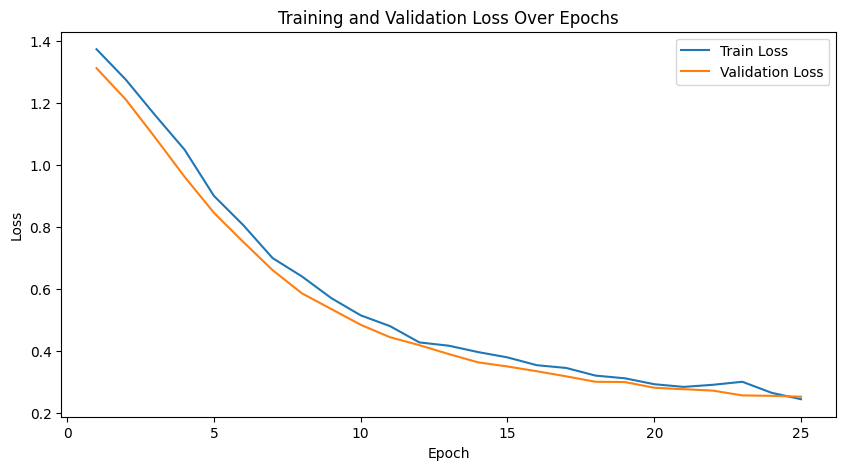

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, EPOCH_NUMBER + 1), train_losses, label='Train Loss')
plt.plot(range(1, EPOCH_NUMBER + 1), valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Over Epochs')
plt.show()

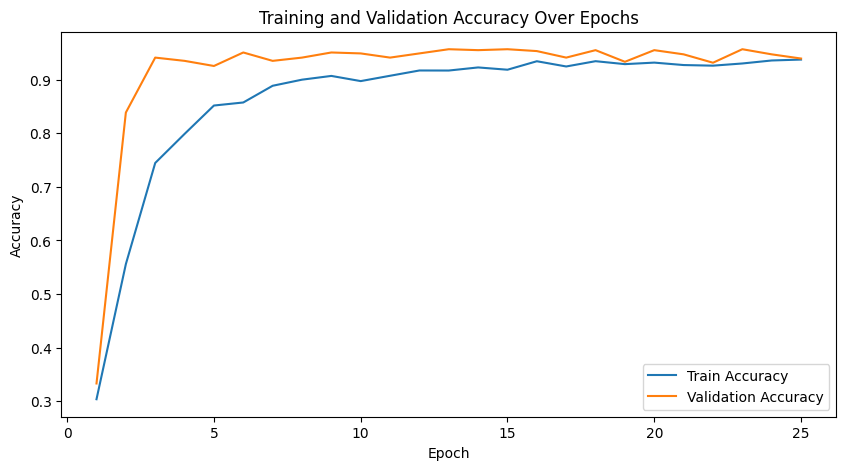

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, EPOCH_NUMBER + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, EPOCH_NUMBER + 1), valid_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Over Epochs')
plt.show()

In [ ]:
test_loss, test_acc = evaluate(model, test_loader, loss_fn)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.304 | Test Acc: 94.14%


In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/img_classification_state_dict.pt')

In [ ]:
torch.save(model, '/content/drive/MyDrive/img_classification.pt')

In [ ]:
model.load_state_dict(torch.load('/content/drive/MyDrive/img_classification_state_dict.pt'))

test_loss, test_acc = evaluate(model, test_loader, loss_fn)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.304 | Test Acc: 94.14%


In [ ]:
#Write your code to build your model here

accuracy = 0.9392 #if you change the name of your accuracy variable, change the name also in the submit parameter



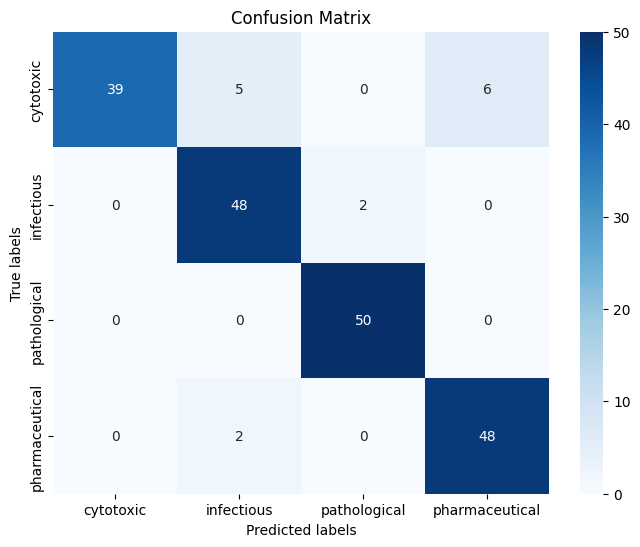

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Evaluasi model pada data validasi
def evaluate_confusion_matrix(model, iterator):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for images, labels in iterator:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    return y_true, y_pred

# Lakukan evaluasi confusion matrix pada data validasi
y_true, y_pred = evaluate_confusion_matrix(model, test_loader)

# Definisikan nama kelas
classes = ['cytotoxic', 'infectious', 'pathological', 'pharmaceutical']

# Plot confusion matrix
plot_confusion_matrix(y_true, y_pred, classes)


### 2.2 Submission

You'll submit the link to your model and the accuracy score for your model in this section.

Remember to download or move/upload your model from Google Colab to your Google Drive. Put the link to the Google Drive for your model below.

If you use a different variable to store your accuracy, remember to also change the `accuracy` variable below.

In [ ]:
# Submit Method
model_link = "https://drive.google.com/file/d/18oxSD3OodOtlO-390EotFFudkDq3rG2U/view?usp=sharing" # Put your model link

question_id = "01_cnn_project_model_link"
submit(student_id, name, assignment_id, model_link, question_id, drive_link)
question_id = "02_cnn_project_model_accuracy"
submit(student_id, name, assignment_id, str(accuracy), question_id, drive_link)

'Assignment successfully submitted'

## Task-3 Model Inference

In this task, you will be exercising the application of your model, or as it's commonly referred to in AI terminology, you will be performing inference using your model.

Simply load your saved model from Task-2 and create an inference for the model. Where you'll feed an image as input and the model will output the label as well as the percentage of confidence for the label.

### 3.1 Write your code in the block below

In the code block below write the code to use the model you created in Task-2. Load the model and input image, afterwards, show the result of the label/class together with confidence level in percentage as well as the input image.

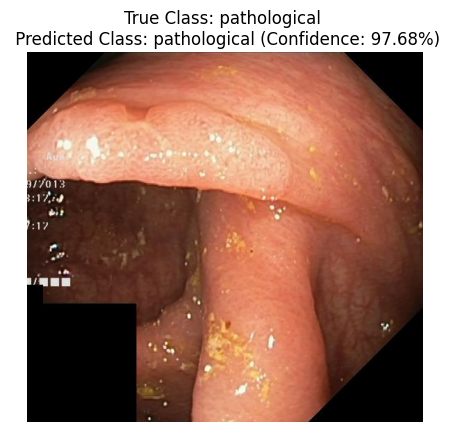

In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def predict_image(image_path, model, transform, class_names):
    # Load the image
    image = Image.open(image_path)
    # Apply transformations
    image = transform(image).unsqueeze(0)  # Add batch dimension

    # Set the model to evaluation mode
    model.eval()

    # Make predictions
    with torch.no_grad():
        outputs = model(image.to(device))
        _, predicted = torch.max(outputs, 1)
        predicted_class = predicted.item()
        predicted_label = class_names[predicted_class]
        probabilities = torch.softmax(outputs, dim=1)[0]
        confidence = probabilities[predicted_class].item()
        return predicted_class, predicted_label, confidence

# Define transformation to be applied to the input image
image_transform = transforms.Compose([
    transforms.Resize((299, 299)),  # Resize to match InceptionV3 input size
    transforms.ToTensor(),
    # You can add more transformations such as normalization if needed
])

# Load the trained model
model = torch.load('/content/drive/MyDrive/img_classification.pt')
model.to(device)

# Load class names (assuming you have a list of class names)
class_names = ['cytotoxic', 'infectious', 'pathological', 'pharmaceutical']

# Provide the path to the image you want to predict
image_path = '/content/drive/MyDrive/Dataset/test/Pathological/cju2tvrvm53ws0801a0jfjdxg.jpg'

# Load the true label (assuming you have it)
true_label = 'pathological'

# Predict the class label
predicted_class, predicted_label, confidence = predict_image(image_path, model, image_transform, class_names)

# Display the image
image = Image.open(image_path)
plt.imshow(np.array(image))
plt.axis('off')
plt.title(f'True Class: {true_label} \n Predicted Class: {predicted_label} (Confidence: {confidence*100:.2f}%)')
plt.show()


### 3.2 Submission

You'll submit a screenshot of your inference in this section. Remember to save the screenshot first before submitting it.

Hint:

![Upload colab](https://storage.googleapis.com/rg-ai-bootcamp/project-3-pipeline-and-gradio/upload-colab.png)

- In Google Colab you can just use the "Folder" sidebar and click the upload button. Make sure your screenshot match below requirements:

    - Image name screenshot is `submission.jpg`. If you change the name of the screenshot  file, change it also in the submit_image parameter.
    - The input image and label as well as percentage of confidence should be included in the screenshot

Here is an example of a correct screenshot:

![Screenshot submission sammple - hummer](https://storage.googleapis.com/rg-ai-bootcamp/projects/project-5-cnn-hummer.png)

In [ ]:
# Submit Method

question_id = "03_cnn_project_inference"
submit_image(student_id, question_id, '/content/output.png')

'Assignment successfully submitted'

## Task-4 Model Publishing

In this task, you will push your model to Huggingface. Once you've pushed your model to the Hugging Face Model Hub, you'll have a link that points directly to your model's page. You can share this link with others, and they can use it to directly load your model for their own uses.

### 4.1 Write your code in the block below

In the code block below, write the code to push your model to Huggingface. There are several methods to do this, please refer to the documentation: https://huggingface.co/docs/transformers/model_sharing

Some techniques you may use:
- If you use the Transformer Trainer during the training loop when you create your model above, then you can simply put your `trainer.push_to_hub()` here.
- You can also use the web interface on Huggingface.

Hint:
- Remember to login first to your Huggingface account.
- If you are pushing programmaticaly, then use the huggingface-cli to login.

- https://huggingface.co/docs/hub/models-uploading (ini)
- https://huggingface.co/docs/transformers/custom_models
- https://huggingface.co/docs/transformers/custom_models#sharing-custom-models
- https://huggingface.co/docs/transformers/model_sharing

In [16]:
from huggingface_hub import notebook_login

notebook_login()


In [6]:
#Write your code for publishing here

model = torch.load('/content/drive/MyDrive/SKILL ACADEMY/PROJECT 8/img_classification.pt', map_location=torch.device('cpu'))


In [11]:
import torch
import torch.nn as nn
from torchvision import models
from huggingface_hub import PyTorchModelHubMixin

In [12]:
class MyImageClassificationModel(nn.Module, PyTorchModelHubMixin):
    def __init__(self, num_classes):
        super().__init__()
        self.base_model = models.inception_v3(pretrained=True)

        # Freeze all layers
        for param in self.base_model.parameters():
            param.requires_grad = False

        # Modify the last layers for our task
        in_features = self.base_model.fc.in_features
        self.base_model.fc = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(in_features, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.base_model(x)

In [13]:
# Create an instance of the model
num_classes = 4  # Change this according to your problem
model = MyImageClassificationModel(num_classes)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:01<00:00, 70.8MB/s] 


In [15]:
model.save_pretrained("my-image-classification-model", config={"num_classes": num_classes})

In [17]:
# Push the model to the Hugging Face Model Hub
model.push_to_hub("image-classification", config={"num_classes": num_classes})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/102M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Firdho/image-classification/commit/ed65a6ee5309d4a8763882a33c3380a0809ada63', commit_message='Push model using huggingface_hub.', commit_description='', oid='ed65a6ee5309d4a8763882a33c3380a0809ada63', pr_url=None, pr_revision=None, pr_num=None)

### 4.2 Submission

You'll submit a a link to your huggingface model in this section.

The following link is an example of what a trained model's page looks like: https://huggingface.co/aditira/emotion_classification. This is not your model, but rather an example of what your final result might resemble.

Remember, for this project you should push your output model to your own Hugging Face account. The link for your model will be different and should reflect your own username and model name.

In [21]:
# Submit Method
huggingface_model_link = "https://huggingface.co/Firdho/image-classification" # Put your model link

question_id = "04_cnn_project_publish"
submit(student_id, name, assignment_id, huggingface_model_link, question_id, drive_link)

'Assignment successfully submitted'

FIN